<a href="https://colab.research.google.com/github/anuj-glitch/Wine-variety-prediction/blob/master/Wine_variety_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
#mounting google drive...
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
#loading the training dataset
df = pd.read_csv('/content/drive/My Drive/ml/train.csv')
df

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
...,...,...,...,...,...,...,...,...,...,...,...,...
82652,@wineschach,Spain,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Crianza,84,12.0,Northern Spain,Rioja,NaN,Montecillo,Tempranillo
82653,NaN,US,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Single Vineyard,85,21.0,New Mexico,New Mexico,NaN,Vivác Winery,Cabernet Sauvignon
82654,@vossroger,France,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Nouveau,87,14.0,Beaujolais,Beaujolais-Villages,NaN,Domaine de la Madone,Gamay
82655,@vossroger,France,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",NaN,91,20.0,Bordeaux,Haut-Médoc,NaN,Château Beaumont,Bordeaux-style Red Blend


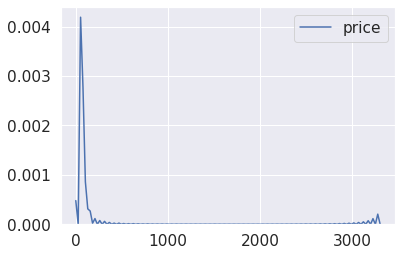

In [211]:
#some visualization of data

sns.kdeplot(df.price)


## Majority of the price for wines ranges between 0 to 250, 
## also few wines has price as high as 3000 also.

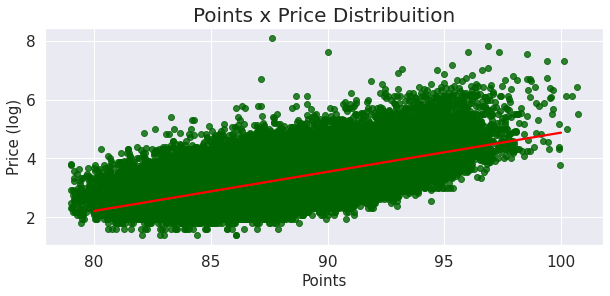

In [212]:

df['points'] = df['points']
df['price_log'] = np.log(df['price'])

#Crossing prices and Points
plt.figure(figsize=(10,4))

g = sns.regplot(x='points', y='price_log', 
                data=df, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price (log)", fontsize= 15)
plt.show()

#Very meaningfull scatter plot.


*   The highest prices isn't of the wine with highest points.
*   The most expensive wine have points between 87 and 90




###Maybe it would be interesting to find cheapest wines with the same quality.

Top countries that the wine is from 



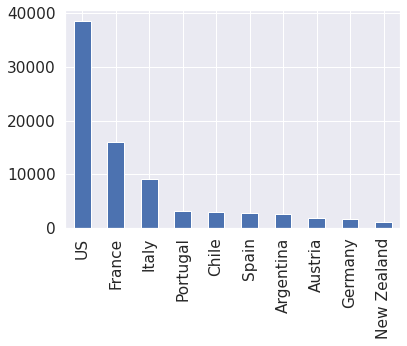

In [213]:
# bar plot
print("Top countries that the wine is from \n")
df['country'].value_counts().head(10).plot.bar()

Top province(state) that the wine is from


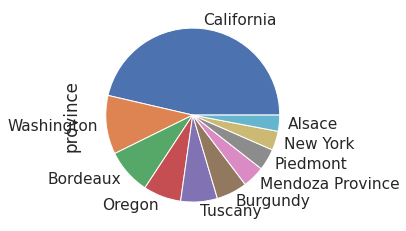

In [214]:
print("Top province(state) that the wine is from")
df['province'].value_counts().head(10).plot.pie()

In [215]:
#features selection ( only taking review_title and	review_description as other features are not contributing much for the prediction of variety.)
df = df.drop(['region_2','region_1','country','province','winery','user_name','designation','price','points', 'price_log'],axis=1)

# making new data frame with dropped NAN values
data = df.dropna(axis = 0, how ='any') 
data

,review_title,review_description,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Malbec
...,...,...,...
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",Tempranillo
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",Cabernet Sauvignon
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,Gamay
82655,Château Beaumont 2011 Haut-Médoc,"An impressive wine, it already shows signs of ...",Bordeaux-style Red Blend


In [0]:
#fiting the TfidfVectorizer on corpus of review_title and	review_description that will be going to use in the testset also.
tfidf1 = TfidfVectorizer(stop_words='english').fit(data['review_title'])
tfidf2 = TfidfVectorizer(stop_words='english').fit(data['review_description'])

def create_features(data):
    review_title = tfidf1.transform(data['review_title'])
    review_description = tfidf2.transform(data['review_description'])
    return hstack((review_title, review_description))

features2 = create_features(data)
y = data['variety']

In [217]:
# dividing the data into train(80%) and test(20%)
train_x, test_x, train_y, test_y = train_test_split(features, y, test_size=0.2, random_state=42)

# Creating SVM model
classifier = LinearSVC()
linearSVC_model = classifier.fit(train_x, train_y) 
y_score = linearSVC_model.predict(test_x)

# calculating accuracy score
print("accuracy score is : "+ str(accuracy_score(test_y, y_score))) 

accuracy score is : 0.9748366803774497


Confusion Matrix :


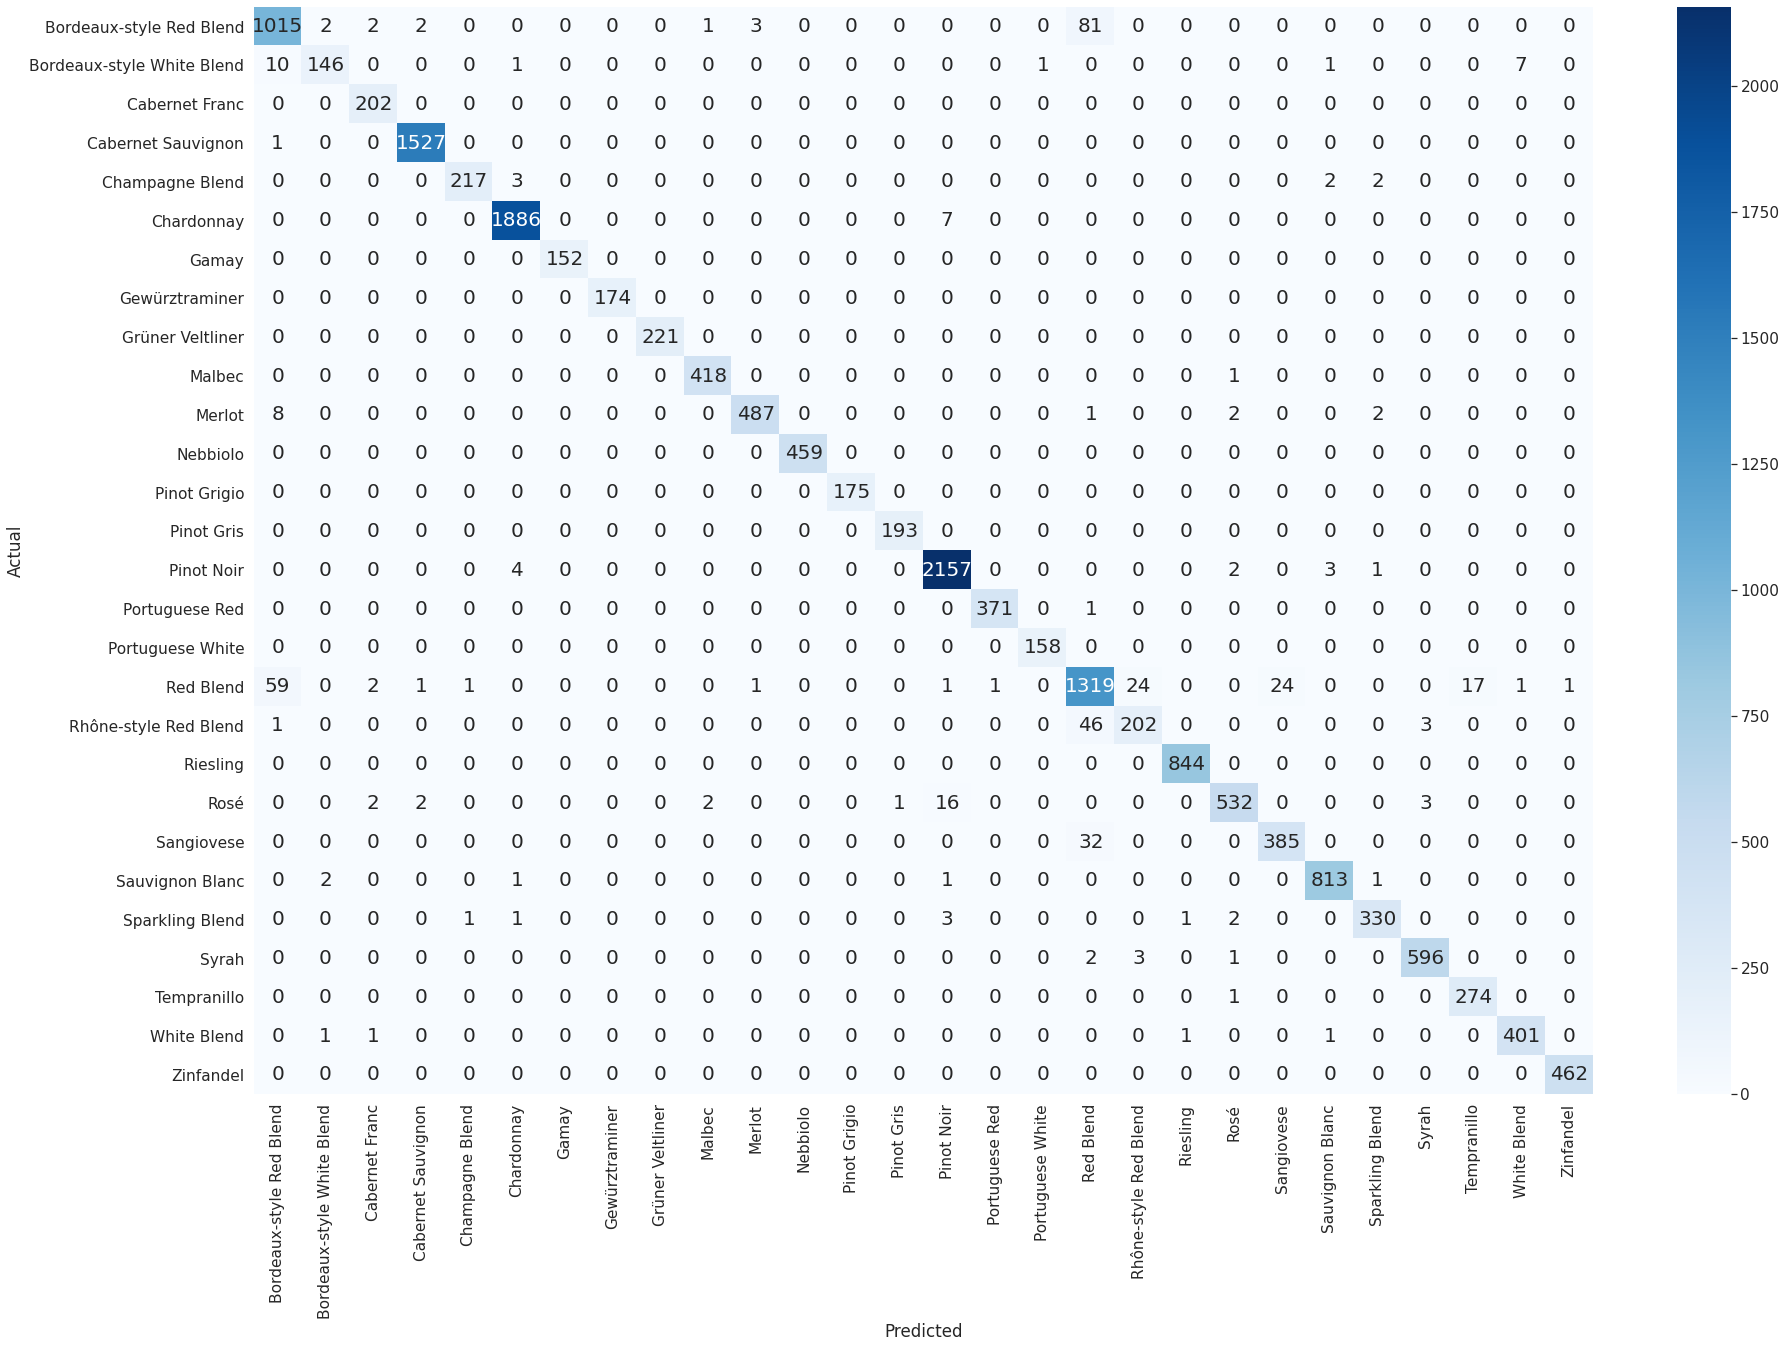

In [218]:
# Python script for confusion matrix creation. 
print('Confusion Matrix :')
cm = confusion_matrix(test_y, y_score) 

df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (30,20))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt='d',annot_kws={"size": 20})

In [219]:
print("classification report :")
print( classification_report(test_y, y_score) )

classification report :
                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.93      0.92      0.92      1106
Bordeaux-style White Blend       0.97      0.88      0.92       166
            Cabernet Franc       0.97      1.00      0.98       202
        Cabernet Sauvignon       1.00      1.00      1.00      1528
           Champagne Blend       0.99      0.97      0.98       224
                Chardonnay       0.99      1.00      1.00      1893
                     Gamay       1.00      1.00      1.00       152
            Gewürztraminer       1.00      1.00      1.00       174
          Grüner Veltliner       1.00      1.00      1.00       221
                    Malbec       0.99      1.00      1.00       419
                    Merlot       0.99      0.97      0.98       500
                  Nebbiolo       1.00      1.00      1.00       459
              Pinot Grigio       1.00      1.00      1.00       175
                Pinot G

In [220]:
#making prediction on test dataset
#loading the test dataset
df2 = pd.read_csv('/content/drive/My Drive/ml/test.csv')

features2 = create_features(df2)

predictions = linearSVC_model.predict(features2)
df2['variety'] = pd.Series(predictions)
df2.to_csv('submissions.csv')
df2

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Cabernet Franc
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,Rosé
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,Cabernet Sauvignon
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,Rosé
